In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
data=pd.read_csv("data.csv",encoding="latin1")

In [3]:
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"])

In [10]:
data=data[data["Quantity"]>0]
data=data[data["UnitPrice"]>0]

In [11]:
data["TotalPrice"]=data["UnitPrice"]*data["Quantity"]

In [12]:
data["Month"]=data["InvoiceDate"].dt.to_period("M")
data["Hour"]=data["InvoiceDate"].dt.hour
data["Day"]=data["InvoiceDate"].dt.day_name()

In [13]:
# We are identifying the top 10 products with the highest total sales volume.
# Grouping is done by product description and summing the quantities sold.


In [58]:
top_products=data.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

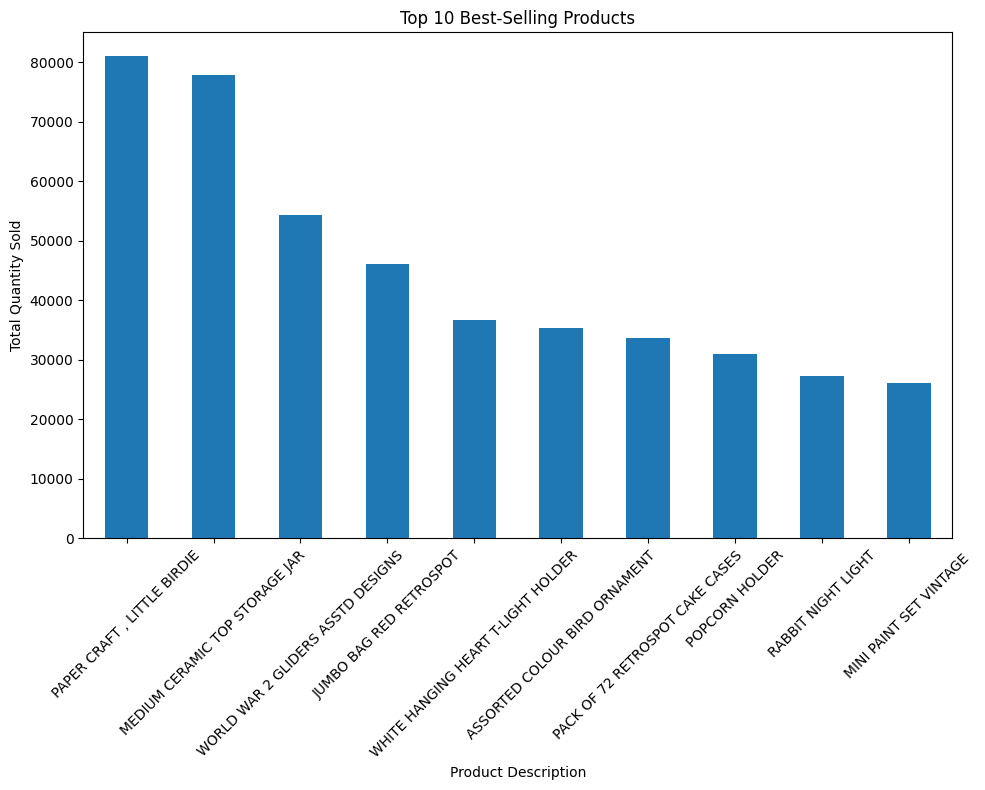

In [59]:
top_products.plot(kind="bar",figsize=(10,8),title="Top 10 Best-Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# We analyze the total revenue per month to identify trends and peak sales periods.
# Helps in understanding seasonality and overall growth.


In [16]:
monthly_revenue=data.groupby("Month")["TotalPrice"].sum().sort_values(ascending=False).head(10)

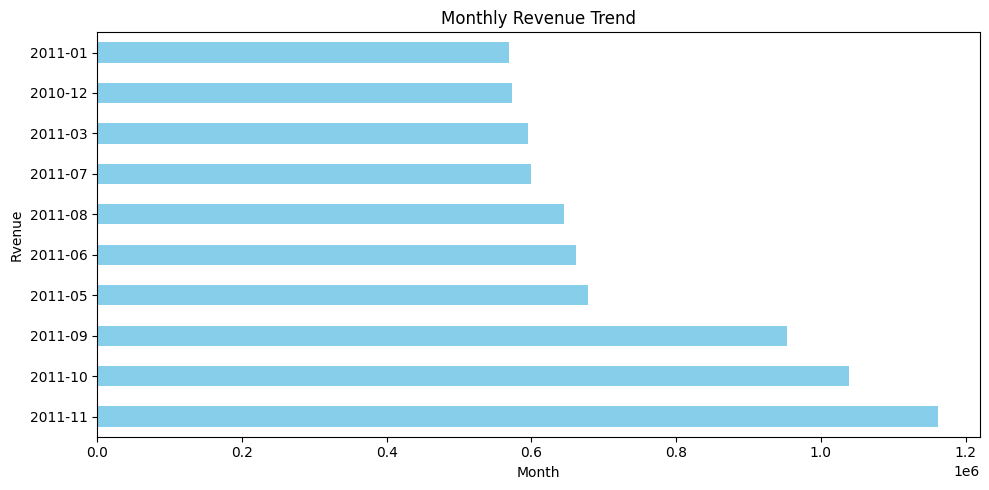

In [67]:
monthly_revenue.plot(kind="barh",figsize=(10,5),title="Monthly Revenue Trend",color='skyblue')
plt.xlabel("Month")
plt.ylabel("Rvenue")
plt.tight_layout()
plt.show()



In [36]:
# Here we find the top 10 countries that generated the highest total revenue.
# This helps identify the most profitable markets for the business.


In [28]:
top_countries=data.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

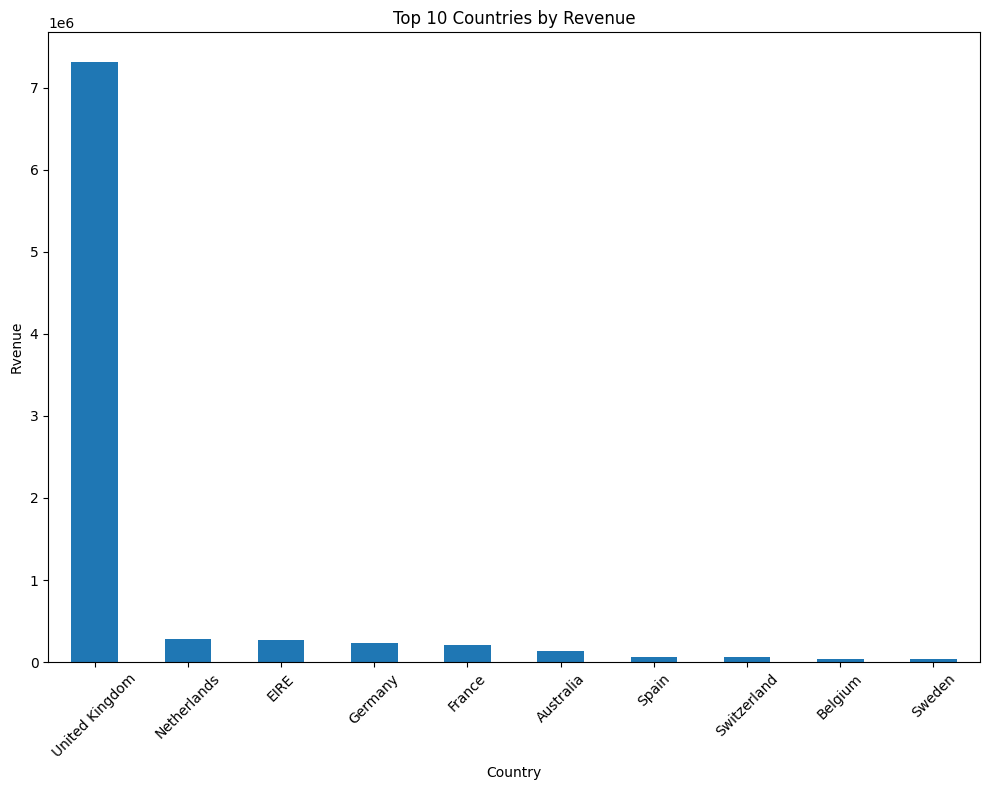

In [62]:
top_countries.plot(kind="bar",figsize=(10,8),title="Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Rvenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# We find the top 10 customers who spent the most money on purchases.
# Helps in understanding customer value and loyalty.


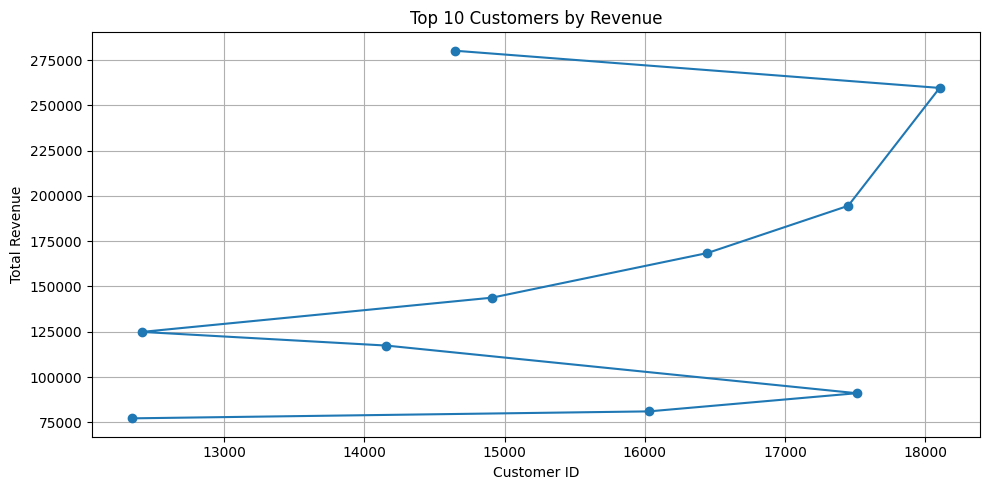

In [70]:
# Group by customer ID and sum the total price
top_customers = data.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)

# Plot top customers
top_customers.plot(kind='line',marker="o", figsize=(10,5), title='Top 10 Customers by Revenue')
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.grid(True)

plt.tight_layout()
plt.show()






In [53]:
# We use a heatmap to analyze sales activity across days of the week and hours of the day.
# Helps detect peak times of customer purchases.


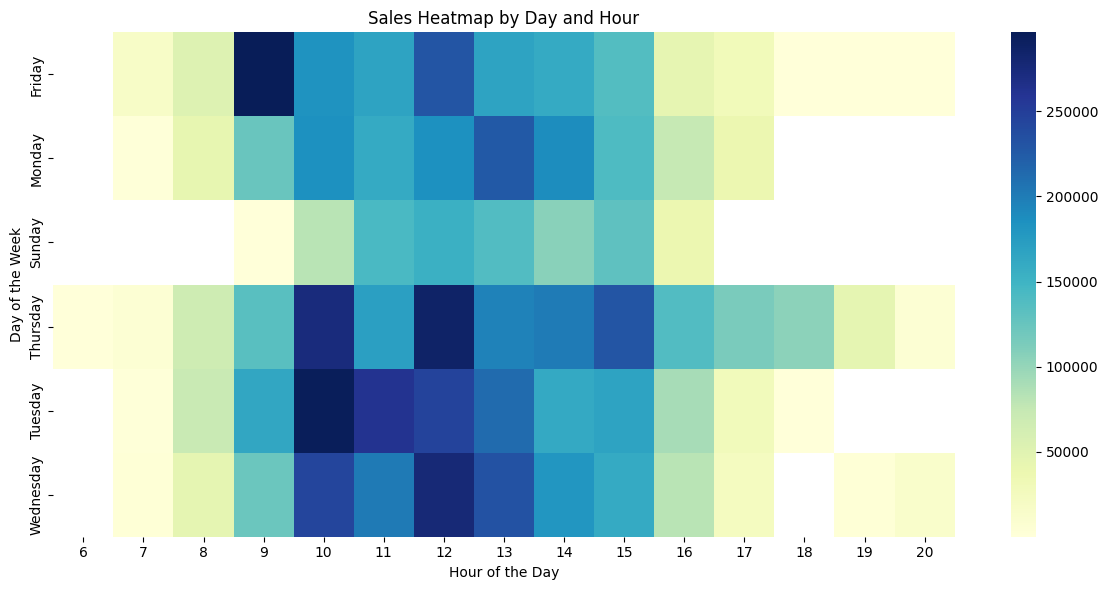

In [54]:
# Create a pivot table for heatmap
heatmap_data = data.pivot_table(index='Day', columns='Hour', values='TotalPrice', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Sales Heatmap by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()


In [71]:
# 📌 Business Insights Summary:

print("""
1. The top-selling product is "WHITE HANGING HEART T-LIGHT HOLDER", with over **75,000** units sold.
   ➤ This suggests it is a customer favorite and a consistent revenue generator.

2. Revenue peaks during **November 2011**.
   ➤ Likely due to holiday shopping, Black Friday, or end-of-year promotions.

3. The UK is the dominant market by far, generating the highest revenue.
   ➤ Other notable countries include the Netherlands and Germany, but with much smaller shares.

4. Most purchases happen between **10 AM and 2 PM**, with **Tuesday and Thursday** being the busiest days.
   ➤ This insight can guide advertising and promotion schedules for maximum impact.

5. A few loyal customers generate a large percentage of the total revenue.
   ➤ For example, the top customer spent over **€275,000**, indicating strong customer lifetime value.

""")



1. The top-selling product is "WHITE HANGING HEART T-LIGHT HOLDER", with over **75,000** units sold.
   ➤ This suggests it is a customer favorite and a consistent revenue generator.

2. Revenue peaks during **November 2011**.
   ➤ Likely due to holiday shopping, Black Friday, or end-of-year promotions.

3. The UK is the dominant market by far, generating the highest revenue.
   ➤ Other notable countries include the Netherlands and Germany, but with much smaller shares.

4. Most purchases happen between **10 AM and 2 PM**, with **Tuesday and Thursday** being the busiest days.
   ➤ This insight can guide advertising and promotion schedules for maximum impact.

5. A few loyal customers generate a large percentage of the total revenue.
   ➤ For example, the top customer spent over **€275,000**, indicating strong customer lifetime value.


